C:\Users\vcritell\AppData\Local\Temp\ipykernel_7480\3776210905.py:21: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original.flatten(), 256, [0, 256], color = 'r')


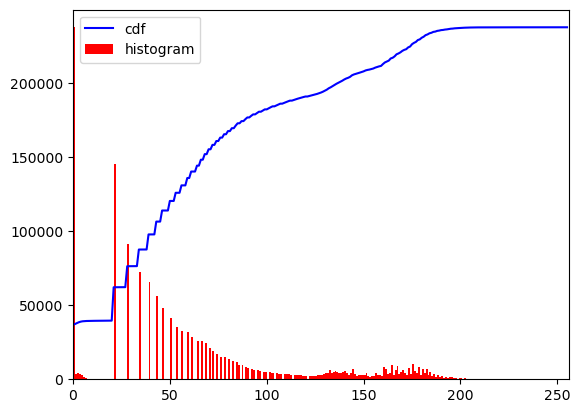

In [110]:
import sys

sys.path.append("C:/Users/vcritell/pymods/paracelso_wp32")

import cv2
import numpy as np
from matplotlib import pyplot as plt

import ot
import s1

image_file = "C:\\Users\\vcritell\\Pictures\\Screenshots\\Screenshot 2025-02-04 180759.png"
original = cv2.imread(image_file, 0)

hist,bins = np.histogram(original.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(original.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [78]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
original = cv2.imread(image_file, 0)
equ = cv2.equalizeHist(original)
res = np.hstack((original,equ)) #stacking images side-by-side
cv2.imwrite('histeq.png',res)

True

In [ ]:
original = cv2.imread(image_file, 1)

eq = list()
for i in range(original.shape[-1]):
    band = original[:, :, i].copy()
    equ = cv2.equalizeHist(band)
    eq.append(equ)


res = np.hstack((original,cv2.merge(eq)))
cv2.imwrite('histeq_rgb.png',res)

True

In [ ]:
def _clahe(band, clip_limit: float = 2., kernel_size: int | tuple[int] = 3,
           mask=None, nodata: int | float | None = np.nan):
    """Contrast limited adaptive histogram equalization"""
    if mask is None:
        mask = np.zeros_like(band).astype(bool)
    
    if isinstance(kernel_size, int):
        kernel_size = kernel_size, kernel_size
        
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=kernel_size)
    clahe_band = clahe.apply(band)
    clahe_band[mask] = nodata
    return clahe_band


In [ ]:
original = cv2.imread(image_file,0)

for BS in [4, 8, 16, 32, 64, 128]:
    clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(BS, BS))
    clahe_img = clahe.apply(original)
    stacked = np.hstack([original, clahe_img])
    cv2.imwrite(f"clahe_{BS}.png", stacked)

In [109]:
original = cv2.imread(image_file,1)
BS = 16
for CL in np.arange(0, 10, 0.5):
    clhs = list()
    for band in cv2.split(original):
        clahe = cv2.createCLAHE(clipLimit=CL, tileGridSize=(BS, BS))
        clhs.append(clahe.apply(band))
    
    clahe_img = cv2.merge(clhs)
    stacked = np.hstack([original, clahe_img])
    cv2.imwrite(f"clahe_BS{BS}CL{CL:.2f}_rgb.png", stacked)